In [27]:
import os

# Create images directory for saving plots
if not os.path.exists('images'):
    os.makedirs('images')
    
print("Images directory created for saving visualizations")

Images directory created for saving visualizations


# Hotel Booking Dataset EDA

This notebook provides a basic exploratory data analysis of the hotel booking dataset.

##  Import Libraries and Load Data

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [29]:
# Load the dataset
df = pd.read_csv('Hotel_Booking.csv')
print(f"Dataset shape: {df.shape}")
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset shape: (36285, 17)
Dataset has 36285 rows and 17 columns


In [30]:
df = df.drop(columns=['Booking_ID'])

##  Basic Dataset Information

In [4]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [5]:
# Dataset info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null

In [6]:
# Column names
print("Column names:")
print(df.columns.tolist())

Column names:
['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests', 'date of reservation', 'booking status']


##  Missing Values Check

In [7]:
# Check for missing values
print("Missing values in each column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found in the dataset!")

Missing values in each column:
Series([], dtype: int64)
No missing values found in the dataset!


##  Basic Statistics

In [8]:
# Numerical columns statistics
print("Basic statistics for numerical columns:")
df.describe()

Basic statistics for numerical columns:


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [9]:
# Categorical columns value counts
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols.tolist()}")

for col in categorical_cols:
    print(f"\n{col} - Unique values: {df[col].nunique()}")
    print(df[col].value_counts().head())

Categorical columns: ['type of meal', 'room type', 'market segment type', 'date of reservation', 'booking status']

type of meal - Unique values: 4
type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

room type - Unique values: 7
room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Name: count, dtype: int64

market segment type - Unique values: 5
market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

date of reservation - Unique values: 553
date of reservation
10/13/2018    254
10/16/2017    236
6/15/2018     231
6/24/2018     213
9/18/2017     201
Name: count, dtype: int64

booking status - Unique values: 2
booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64


## Visualizations

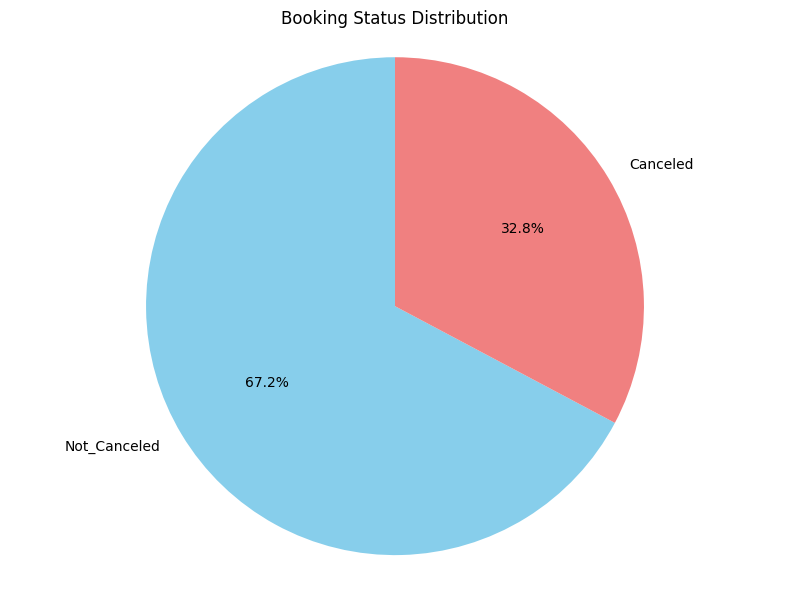

Booking Status Percentages:
Not_Canceled: 67.2%
Canceled: 32.8%


In [31]:
# Booking status distribution
plt.figure(figsize=(8, 6))
booking_counts = df['booking status'].value_counts()
plt.pie(booking_counts.values, labels=booking_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Booking Status Distribution')
plt.axis('equal')
plt.tight_layout()
plt.savefig('images/booking_status_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print percentages
booking_status_pct = df['booking status'].value_counts(normalize=True) * 100
print("Booking Status Percentages:")
for status, pct in booking_status_pct.items():
    print(f"{status}: {pct:.1f}%")

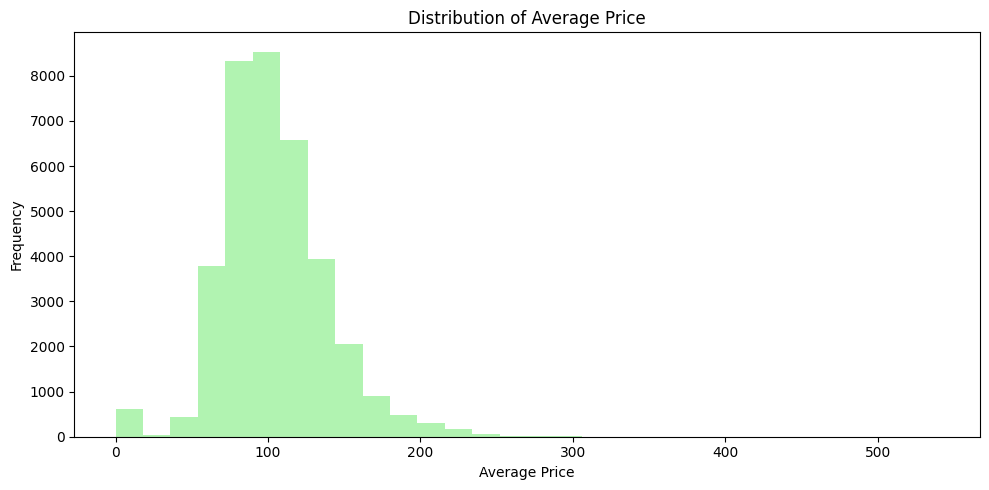

Average price statistics:
Mean: $103.42
Median: $99.45
Min: $0.00
Max: $540.00


In [32]:
# Average price distribution
plt.figure(figsize=(10, 5))
plt.hist(df['average price '], bins=30, color='lightgreen', alpha=0.7)
plt.title('Distribution of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('images/price_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Average price statistics:")
print(f"Mean: ${df['average price '].mean():.2f}")
print(f"Median: ${df['average price '].median():.2f}")
print(f"Min: ${df['average price '].min():.2f}")
print(f"Max: ${df['average price '].max():.2f}")

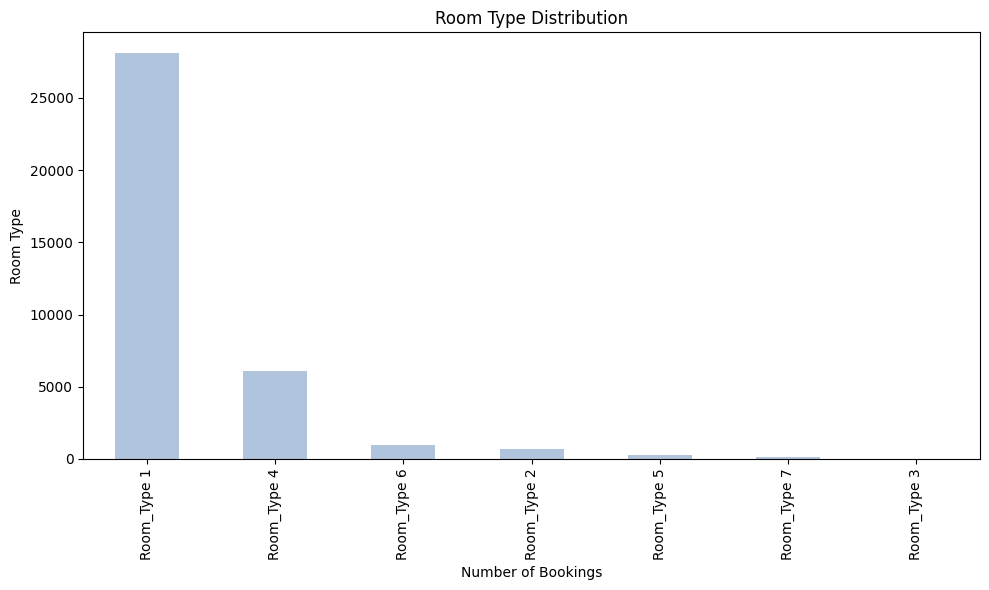


Room Type Statistics:
Room_Type 1: 28,138 bookings (77.5%)
Room_Type 4: 6,059 bookings (16.7%)
Room_Type 6: 966 bookings (2.7%)
Room_Type 2: 692 bookings (1.9%)
Room_Type 5: 265 bookings (0.7%)
Room_Type 7: 158 bookings (0.4%)
Room_Type 3: 7 bookings (0.0%)


In [33]:
# Room type distribution
plt.figure(figsize=(10, 6))
room_counts = df['room type'].value_counts()
room_counts.plot(kind='bar', color='lightsteelblue')
plt.title('Room Type Distribution')
plt.xlabel('Number of Bookings')
plt.ylabel('Room Type')
plt.tight_layout()
plt.savefig('images/room_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the actual counts and percentages
print("\nRoom Type Statistics:")
total_bookings = len(df)
for room_type, count in room_counts.items():
    percentage = (count / total_bookings) * 100
    print(f"{room_type}: {count:,} bookings ({percentage:.1f}%)")

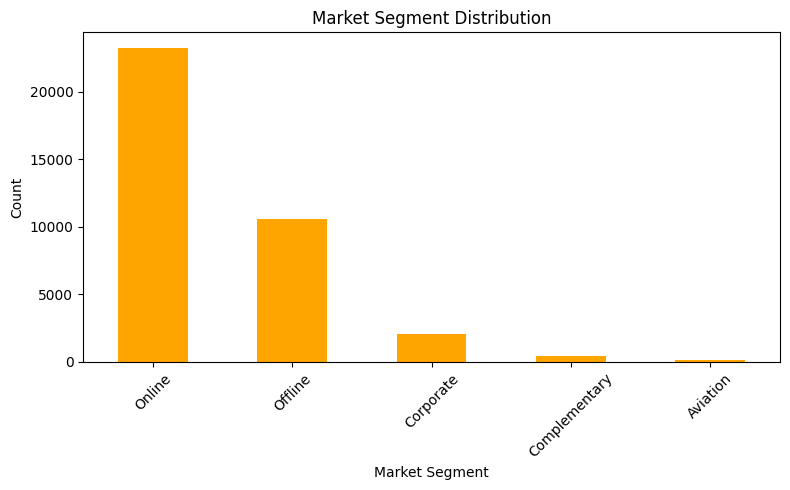

In [13]:
# Market segment distribution
plt.figure(figsize=(8, 5))
df['market segment type'].value_counts().plot(kind='bar', color='orange')
plt.title('Market Segment Distribution')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

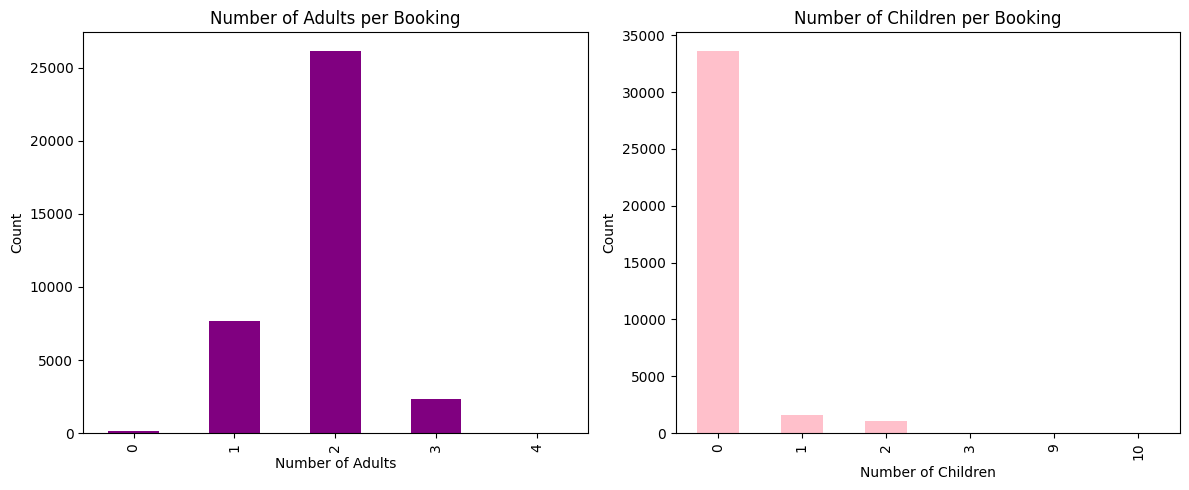

In [14]:
# Number of adults and children
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Adults
df['number of adults'].value_counts().sort_index().plot(kind='bar', ax=ax1, color='purple')
ax1.set_title('Number of Adults per Booking')
ax1.set_xlabel('Number of Adults')
ax1.set_ylabel('Count')

# Children
df['number of children'].value_counts().sort_index().plot(kind='bar', ax=ax2, color='pink')
ax2.set_title('Number of Children per Booking')
ax2.set_xlabel('Number of Children')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

<Axes: xlabel='average price ', ylabel='Density'>

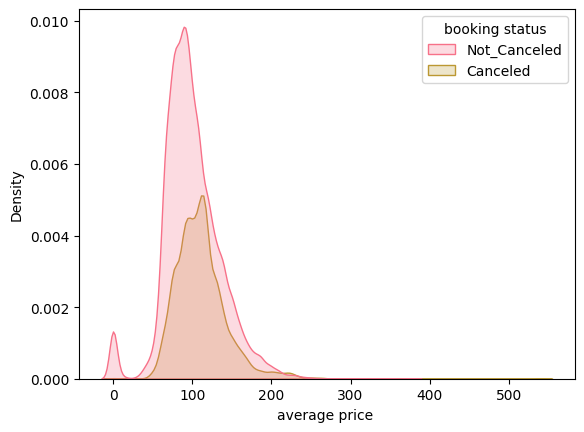

In [15]:
sns.kdeplot(data=df, x='average price ', hue='booking status', fill=True)

C:\Users\ASM El Masrya\AppData\Local\Temp\ipykernel_10544\460833020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='booking status', y='average price ', palette=['lightcoral', 'lightblue'])


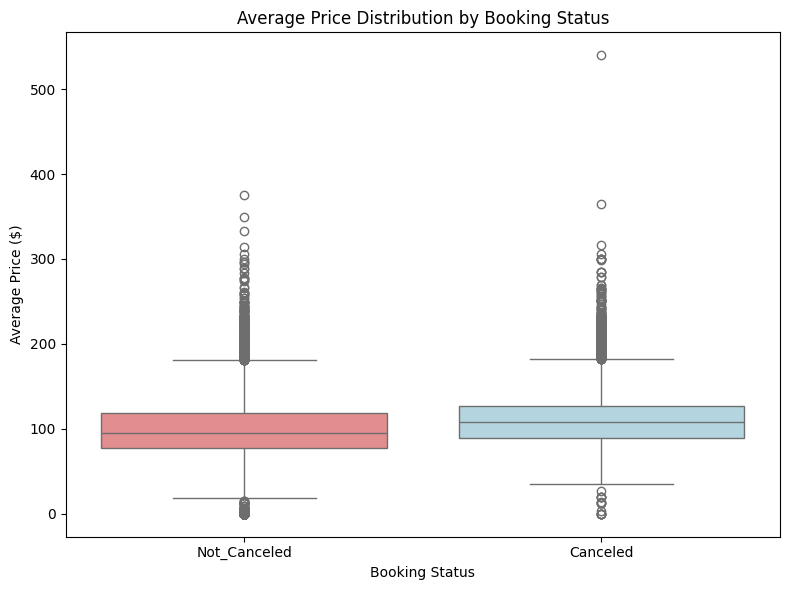

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='booking status', y='average price ', palette=['lightcoral', 'lightblue'])
plt.title('Average Price Distribution by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.savefig('images/price_by_booking_status.png', dpi=300, bbox_inches='tight')
plt.show()

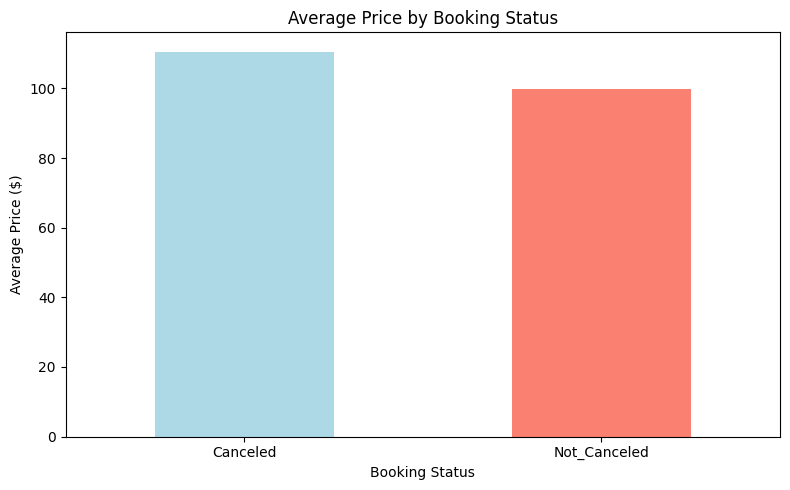

Average price by booking status:
Canceled: $110.58
Not_Canceled: $99.93


In [17]:
# Average price by booking status
plt.figure(figsize=(8, 5))
price_by_status = df.groupby('booking status')['average price '].mean()
price_by_status.plot(kind='bar', color=['lightblue', 'salmon'])
plt.title('Average Price by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Average price by booking status:")
for status, price in price_by_status.items():
    print(f"{status}: ${price:.2f}")

C:\Users\ASM El Masrya\AppData\Local\Temp\ipykernel_10544\3539960741.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='booking status', y='lead time', palette=['lightcoral', 'lightblue'])


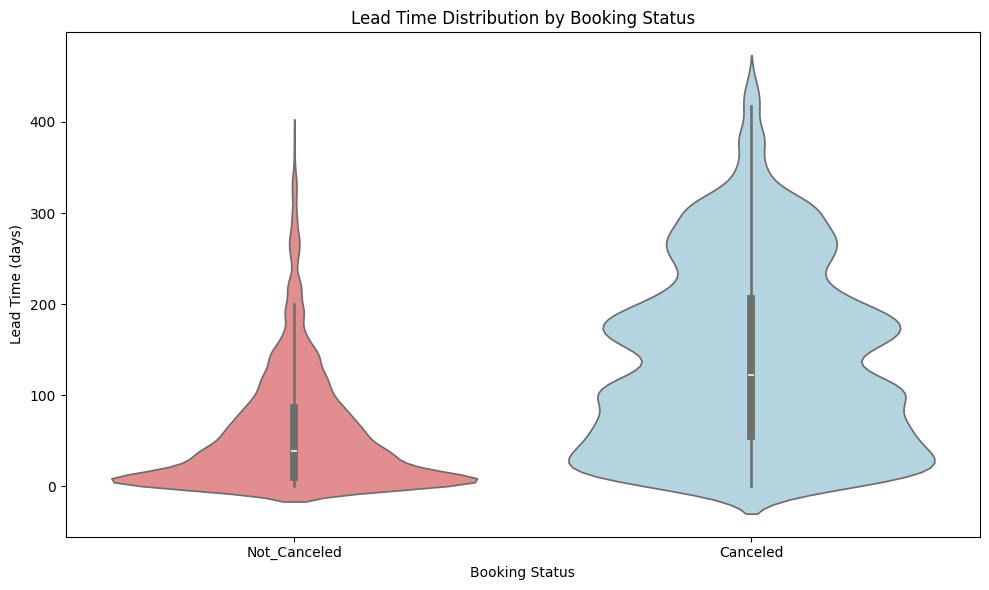

Lead time statistics by booking status:
Canceled: Mean=139.2 days, Median=122.0 days, Std=99.0 days
Not_Canceled: Mean=58.9 days, Median=39.0 days, Std=64.0 days


In [18]:
# Lead time vs booking status
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='booking status', y='lead time', palette=['lightcoral', 'lightblue'])
plt.title('Lead Time Distribution by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time (days)')
plt.tight_layout()
plt.show()

print("Lead time statistics by booking status:")
lead_time_stats = df.groupby('booking status')['lead time'].agg(['mean', 'median', 'std'])
for status in lead_time_stats.index:
    mean_val = lead_time_stats.loc[status, 'mean']
    median_val = lead_time_stats.loc[status, 'median']
    std_val = lead_time_stats.loc[status, 'std']
    print(f"{status}: Mean={mean_val:.1f} days, Median={median_val:.1f} days, Std={std_val:.1f} days")

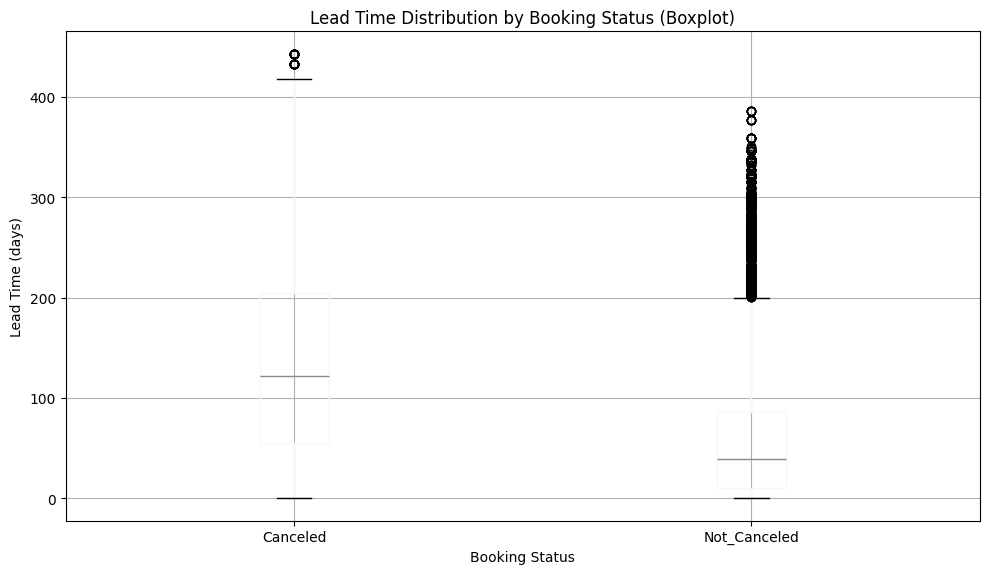

Lead Time Quartile Statistics by Booking Status:

Not_Canceled:
  Q1 (25%): 10.0 days
  Q2 (50% - Median): 39.0 days
  Q3 (75%): 86.0 days
  IQR: 76.0 days

Canceled:
  Q1 (25%): 55.0 days
  Q2 (50% - Median): 122.0 days
  Q3 (75%): 205.0 days
  IQR: 150.0 days


In [19]:

plt.figure(figsize=(10, 6))
df.boxplot(column='lead time', by='booking status', ax=plt.gca())
plt.title('Lead Time Distribution by Booking Status (Boxplot)')
plt.suptitle('')  # Remove default title
plt.xlabel('Booking Status')
plt.ylabel('Lead Time (days)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print quartile statistics
print("Lead Time Quartile Statistics by Booking Status:")
for status in df['booking status'].unique():
    subset = df[df['booking status'] == status]['lead time']
    q1 = subset.quantile(0.25)
    q2 = subset.quantile(0.50)  # median
    q3 = subset.quantile(0.75)
    iqr = q3 - q1
    print(f"\n{status}:")
    print(f"  Q1 (25%): {q1:.1f} days")
    print(f"  Q2 (50% - Median): {q2:.1f} days")
    print(f"  Q3 (75%): {q3:.1f} days")
    print(f"  IQR: {iqr:.1f} days")

<Axes: xlabel='special requests'>

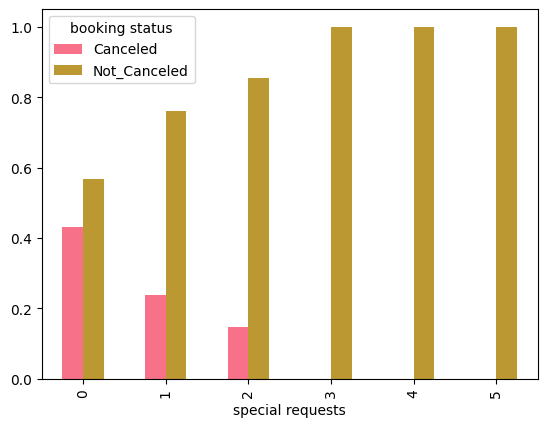

In [20]:
df.groupby('special requests')['booking status'].value_counts(normalize=True).unstack().plot(kind='bar')

<Axes: xlabel='market segment type'>

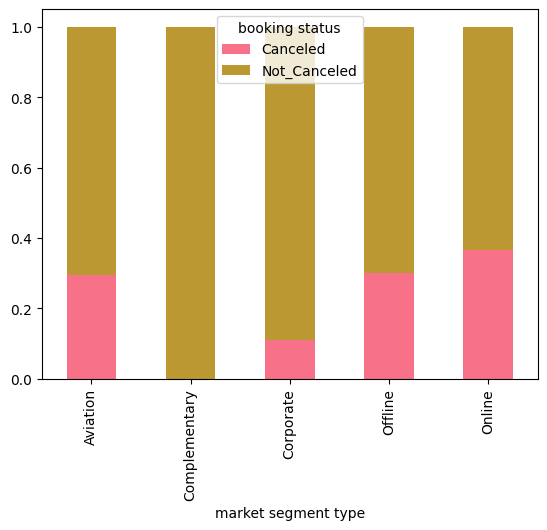

In [21]:
pd.crosstab(df['market segment type'], df['booking status'], normalize='index').plot(kind='bar', stacked=True)

<Axes: xlabel='room type', ylabel='count'>

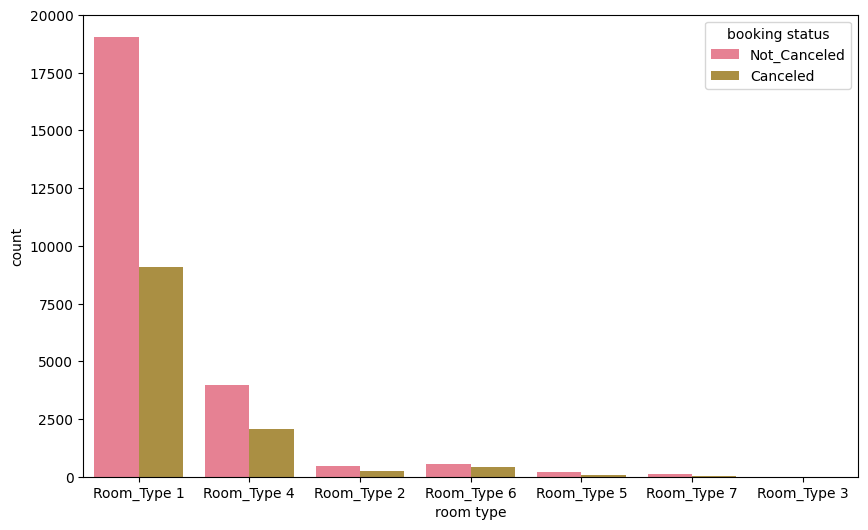

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room type', hue='booking status')

<Axes: xlabel='total_nights', ylabel='Count'>

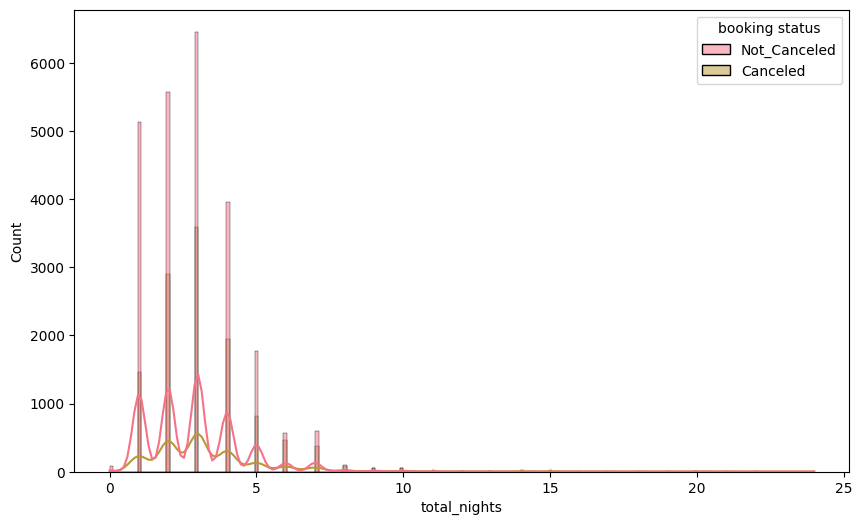

In [23]:
plt.figure(figsize=(10, 6))
df['total_nights'] = df['number of weekend nights'] + df['number of week nights']
sns.histplot(data=df, x='total_nights', hue='booking status', kde=True)

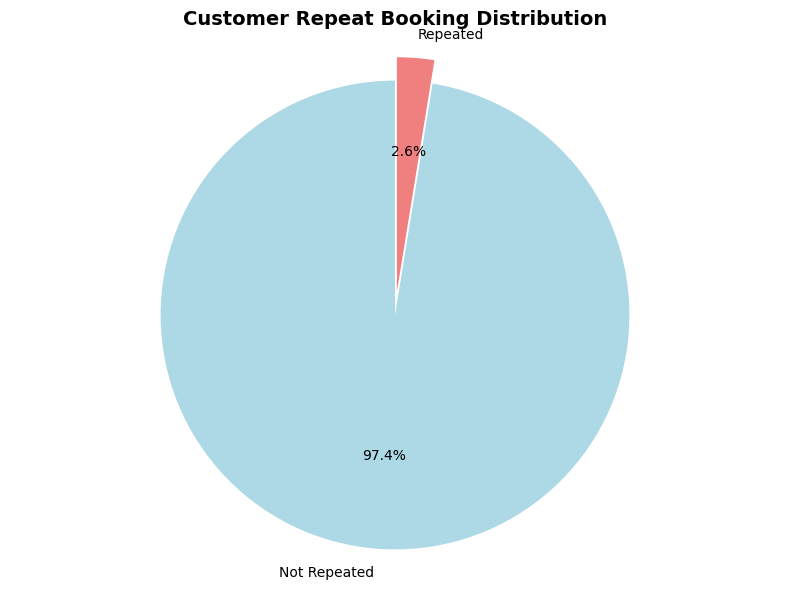

Repeated Customer Statistics:
First-time Customers: 35,355 bookings (97.4%)
Repeated Customers: 930 bookings (2.6%)

Repeat customers cancellation rate:
Repeat customers: 1.7% cancellation rate
First-time customers: 33.6% cancellation rate


In [24]:
# Repeated customer distribution
plt.figure(figsize=(8, 6))
repeated_counts = df['repeated'].value_counts()
colors = ['lightblue', 'lightcoral'] if len(repeated_counts) > 1 else ['lightblue']
labels = ['Not Repeated', 'Repeated'] if len(repeated_counts) > 1 else ['Not Repeated']

plt.pie(repeated_counts.values, labels=labels, autopct='%1.1f%%', 
        startangle=90, colors=colors, explode=(0.1, 0) if len(repeated_counts) > 1 else (0.1,))
plt.title('Customer Repeat Booking Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Print detailed statistics
print("Repeated Customer Statistics:")
total_bookings = len(df)
for value, count in repeated_counts.items():
    percentage = (count / total_bookings) * 100
    status = "Repeated Customers" if value == 1 else "First-time Customers"
    print(f"{status}: {count:,} bookings ({percentage:.1f}%)")

# Check if there's any correlation with booking status
if df['repeated'].sum() > 0:
    print(f"\nRepeat customers cancellation rate:")
    repeat_customers = df[df['repeated'] == 1]
    cancel_rate = (repeat_customers['booking status'] == 'Canceled').mean() * 100
    print(f"Repeat customers: {cancel_rate:.1f}% cancellation rate")
    
    first_time = df[df['repeated'] == 0]
    first_cancel_rate = (first_time['booking status'] == 'Canceled').mean() * 100
    print(f"First-time customers: {first_cancel_rate:.1f}% cancellation rate")
else:
    print(f"\nNote: All customers in this dataset are first-time bookers (repeated = 0)")

<Axes: xlabel='type of meal'>

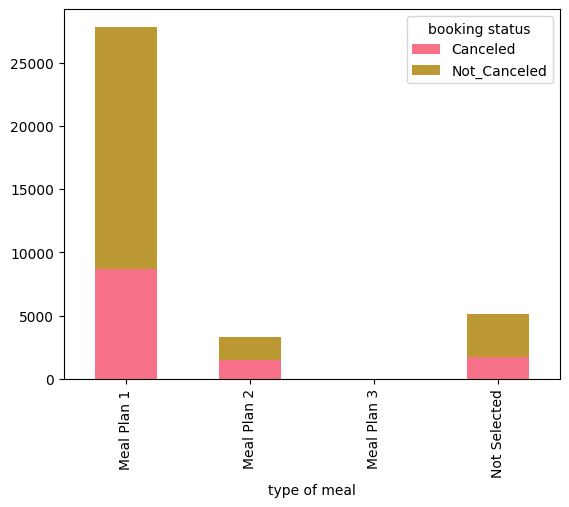

In [25]:
pd.crosstab(df['type of meal'], df['booking status']).plot(kind='bar', stacked=True)

##  Summary Insights

In [26]:
print("=== DATASET SUMMARY ===")
print(f"Total bookings: {len(df):,}")
print(f"Canceled bookings: {len(df[df['booking status'] == 'Canceled']):,}")
print(f"Confirmed bookings: {len(df[df['booking status'] == 'Not_Canceled']):,}")
print(f"Cancellation rate: {(df['booking status'] == 'Canceled').mean()*100:.1f}%")
print(f"\nPrice range: ${df['average price '].min():.2f} - ${df['average price '].max():.2f}")
print(f"Average price: ${df['average price '].mean():.2f}")
print(f"\nMost common room type: {df['room type'].mode()[0]}")
print(f"Most common market segment: {df['market segment type'].mode()[0]}")
print(f"Most common meal plan: {df['type of meal'].mode()[0]}")
print(f"\nAverage lead time: {df['lead time'].mean():.1f} days")
print(f"Average number of adults: {df['number of adults'].mean():.1f}")
print(f"Average number of children: {df['number of children'].mean():.1f}")

=== DATASET SUMMARY ===
Total bookings: 36,285
Canceled bookings: 11,889
Confirmed bookings: 24,396
Cancellation rate: 32.8%

Price range: $0.00 - $540.00
Average price: $103.42

Most common room type: Room_Type 1
Most common market segment: Online
Most common meal plan: Meal Plan 1

Average lead time: 85.2 days
Average number of adults: 1.8
Average number of children: 0.1


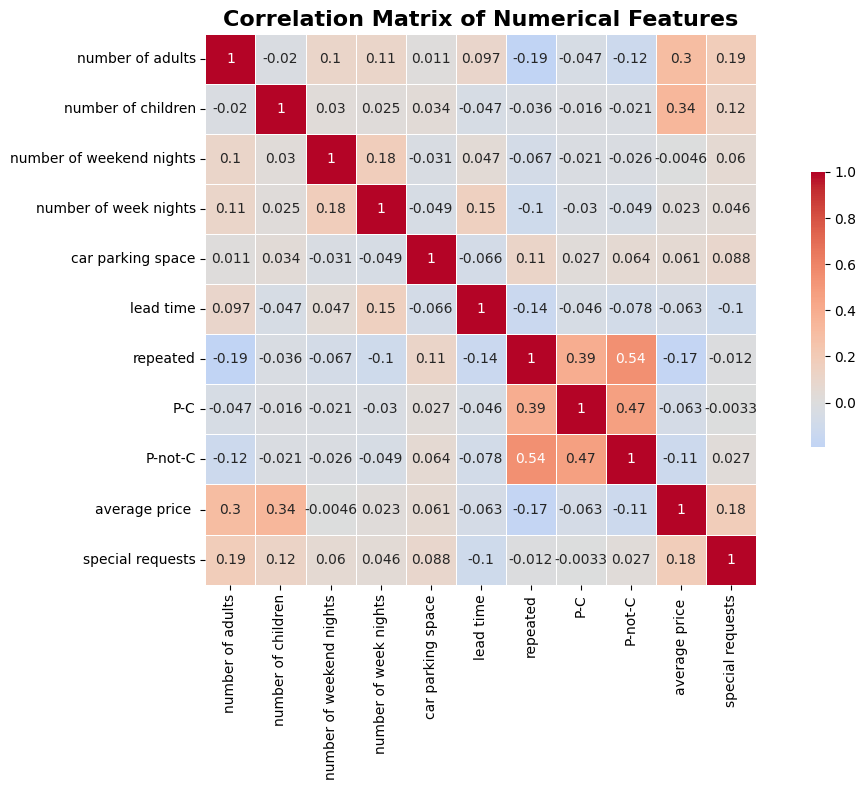

In [35]:
# Create correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('images/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

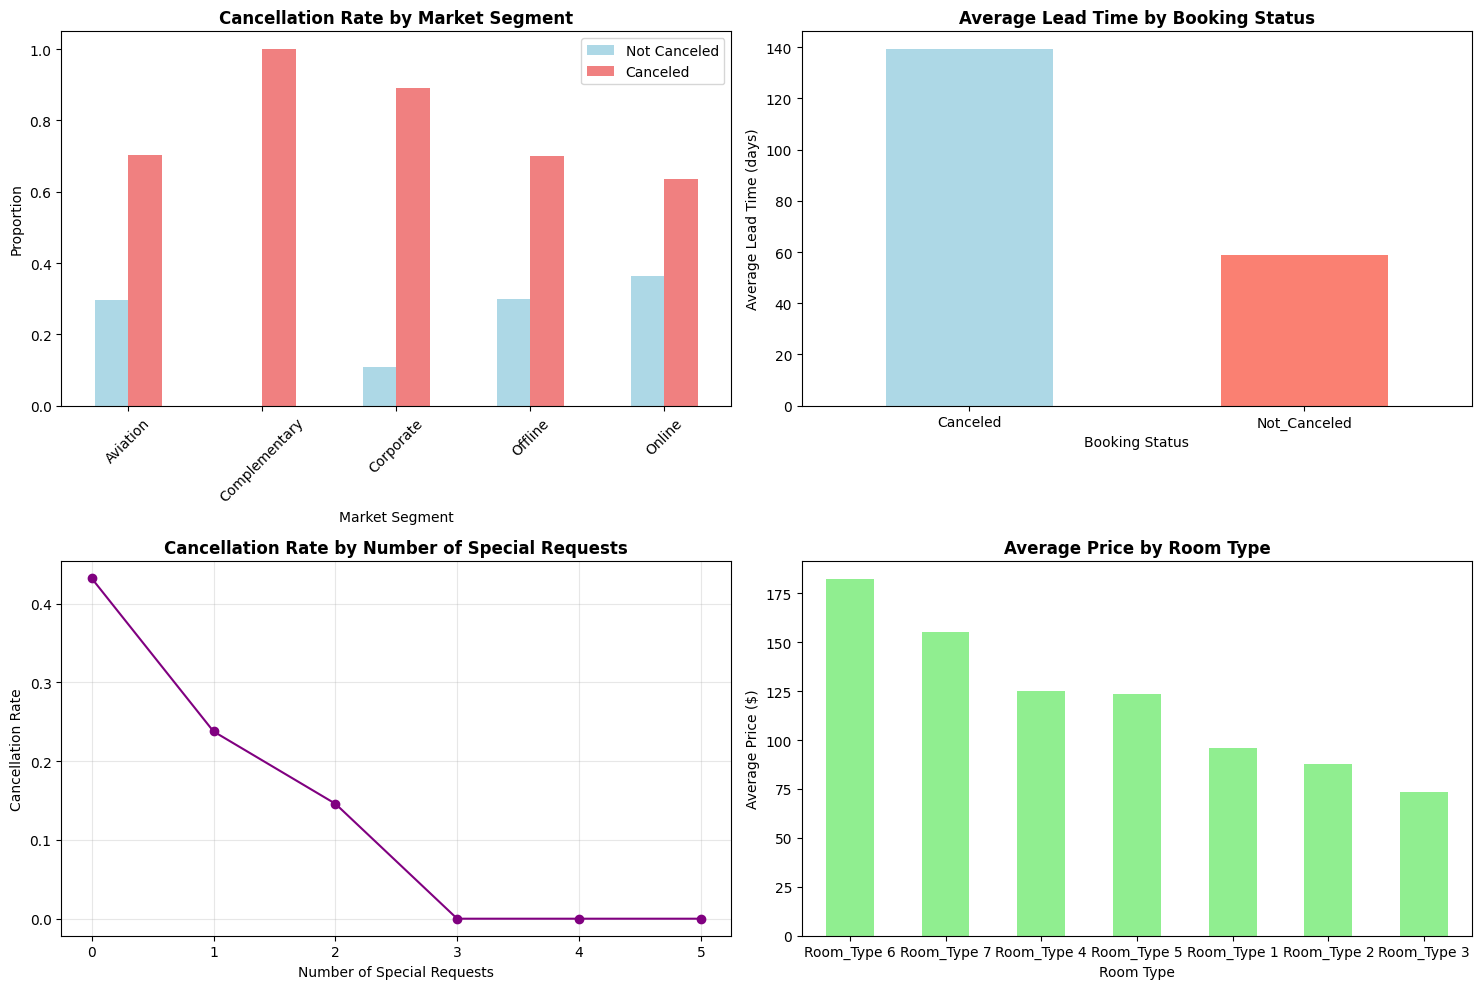

In [36]:
# Create a summary dashboard-style plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Cancellation by Market Segment
market_cancel = pd.crosstab(df['market segment type'], df['booking status'], normalize='index')
market_cancel.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Cancellation Rate by Market Segment', fontweight='bold')
ax1.set_xlabel('Market Segment')
ax1.set_ylabel('Proportion')
ax1.legend(['Not Canceled', 'Canceled'])
ax1.tick_params(axis='x', rotation=45)

# 2. Average Lead Time by Booking Status
lead_time_avg = df.groupby('booking status')['lead time'].mean()
lead_time_avg.plot(kind='bar', ax=ax2, color=['lightblue', 'salmon'])
ax2.set_title('Average Lead Time by Booking Status', fontweight='bold')
ax2.set_xlabel('Booking Status')
ax2.set_ylabel('Average Lead Time (days)')
ax2.tick_params(axis='x', rotation=0)

# 3. Special Requests vs Cancellation
special_req_cancel = df.groupby('special requests')['booking status'].apply(lambda x: (x == 'Canceled').mean())
special_req_cancel.plot(kind='line', ax=ax3, marker='o', color='purple')
ax3.set_title('Cancellation Rate by Number of Special Requests', fontweight='bold')
ax3.set_xlabel('Number of Special Requests')
ax3.set_ylabel('Cancellation Rate')
ax3.grid(True, alpha=0.3)

# 4. Price Distribution by Room Type
room_price = df.groupby('room type')['average price '].mean().sort_values(ascending=False)
room_price.plot(kind='bar', ax=ax4, color='lightgreen')
ax4.set_title('Average Price by Room Type', fontweight='bold')
ax4.set_xlabel('Room Type')
ax4.set_ylabel('Average Price ($)')
ax4.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('images/business_insights_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()